In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import yfinance as yf

In [2]:
sns.set_theme(style='darkgrid')
sns.set(font='Noto Sans Mono')

In [3]:
TRADING_DAYS_IN_A_YEAR = 252
np.random.seed(42)  # For reproducibility

In [4]:
# Get data for multiple stocks
tickers = ['AAPL', 'GOOGL', 'MSFT', 'TSLA']
# tickers = [
#         '^GSPC',  # S&P 500
#         'XOM',  # Exxon Mobil
#         'NEE',  # NextEra Energy
#         'ENPH'  # Enphase Energy
#         ]

data = yf.download(tickers, start='2020-01-01', end='2024-01-01')['Close']

# Compute daily returns
returns = data.pct_change().dropna()

# Compute correlation matrix
correlation_matrix = returns.corr()
# print(correlation_matrix)

[*********************100%***********************]  4 of 4 completed


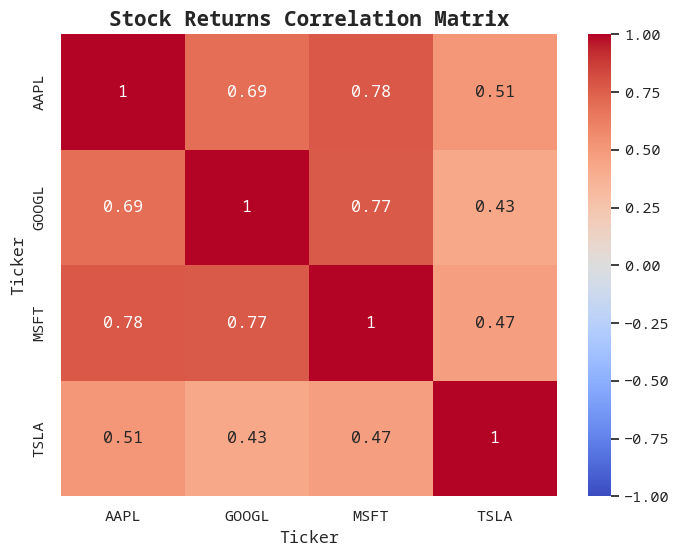

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        vmin=-1,
        vmax=1,
        ax=ax
        )

ax.set_title(
        'Stock Returns Correlation Matrix',
        fontsize=15,
        fontweight='bold'
        )

plt.show()

In [6]:
returns

Ticker,AAPL,GOOGL,MSFT,TSLA
Date,,,,
2020-01-03,-0.009722,-0.005231,-0.012452,0.029633
2020-01-06,0.007968,0.026654,0.002585,0.019255
2020-01-07,-0.004703,-0.001932,-0.009118,0.038801
2020-01-08,0.016086,0.007118,0.015929,0.049205
2020-01-09,0.021241,0.010498,0.012493,-0.021945
...,...,...,...,...
2023-12-22,-0.005548,0.007620,0.002784,-0.007701
2023-12-26,-0.002841,0.000212,0.000213,0.016116
2023-12-27,0.000518,-0.008126,-0.001575,0.018822


In [7]:
mean_returns = returns.mean().values * TRADING_DAYS_IN_A_YEAR
std_devs = returns.std().values * np.sqrt(TRADING_DAYS_IN_A_YEAR)
cov_matrix = returns.cov().values * TRADING_DAYS_IN_A_YEAR

In [8]:
# Let's assume a portfolio with equal weights
portfolio_weights = np.array([0.25, 0.25, 0.25, 0.25])
assert np.isclose(np.sum(portfolio_weights), 1), "Portfolio weights do not sum to 1"

In [9]:
n_simulations = 10_000  # Number of Monte Carlo simulations
n_assets = len(tickers)

simulated_returns = np.random.multivariate_normal(mean_returns, cov_matrix, n_simulations)

portfolio_returns = np.dot(simulated_returns, portfolio_weights)

mean_portfolio_return = np.mean(portfolio_returns)
value_at_risk_95 = np.percentile(portfolio_returns, 5)  # 5th percentile (95% VaR)
loss_prob = np.mean(portfolio_returns < 0)  # Probability of loss

In [10]:
print(f'Mean Portfolio Return: {mean_portfolio_return:.4f}')
print(f'95% VaR: {value_at_risk_95:.4f}')
print(f'Probability of Loss: {loss_prob:.4f}')

Mean Portfolio Return: 0.3948
95% VaR: -0.1783
Probability of Loss: 0.1274


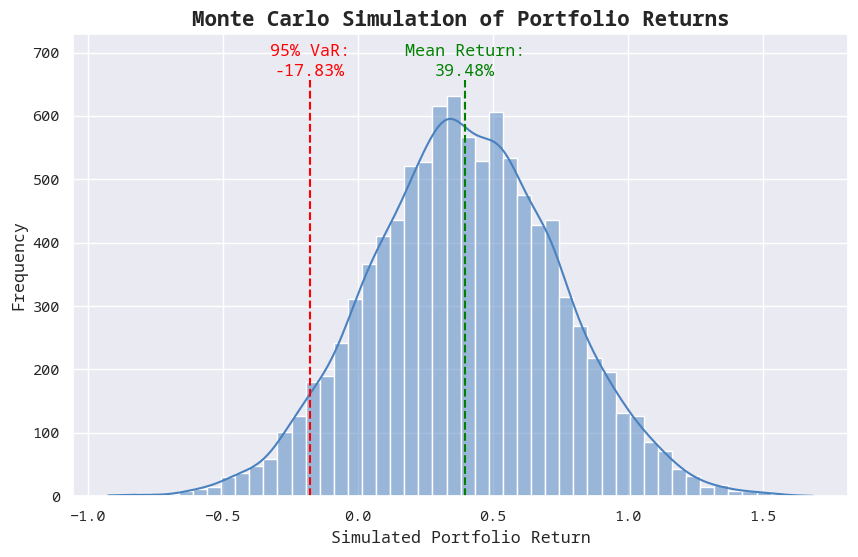

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(
        portfolio_returns,
        bins=50,
        kde=True,
        color='#4A81BF',
        ax=ax
        )

var_line = ax.axvline(
        value_at_risk_95,
        ymin=0,
        ymax=0.90,
        color='red',
        linestyle='dashed',
        label=f'95% VaR: {value_at_risk_95:.2%}'
        )

ax.text(
        x=value_at_risk_95,
        y=0.992 * ax.get_ylim()[1],
        s=f'95% VaR:\n{value_at_risk_95:.2%}',
        color='red',
        ha='center',
        va='bottom'
        )

ax.axvline(
        mean_portfolio_return,
        ymin=0,
        ymax=0.90,
        color='green',
        linestyle='dashed',
        label=f'Mean Return: {mean_portfolio_return:.2%}'
        )

ax.text(
        x=mean_portfolio_return,
        y=0.992 * ax.get_ylim()[1],
        s=f'Mean Return:\n{mean_portfolio_return:.2%}',
        color='green',
        ha='center',
        va='bottom'
        )

ax.set_xlabel("Simulated Portfolio Return")
ax.set_ylabel("Frequency")

# hide legend
ax.legend().set_visible(False)

ax.set_title(
        "Monte Carlo Simulation of Portfolio Returns",
        fontsize=15,
        fontweight='bold'
        )

# raise ylim
ax.set_ylim([0, 1.1 * ax.get_ylim()[1]])


plt.show()